In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Weather_data.csv')

In [53]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0


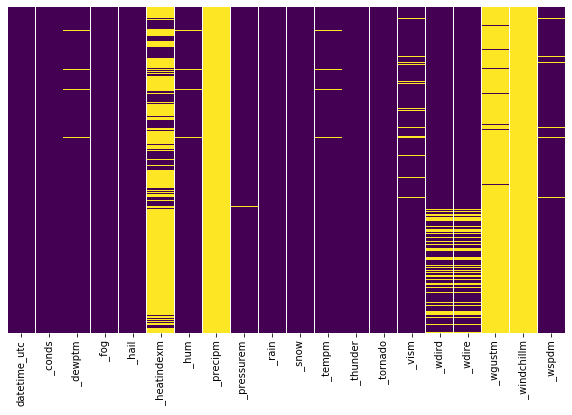

In [4]:
plt.figure(figsize = (10,6))
sns.heatmap(data.isnull(),yticklabels = False,cbar= False,cmap='viridis')

In [5]:
data.drop([' _heatindexm',' _precipm',' _wgustm',' _windchillm'],axis =1,inplace = True)

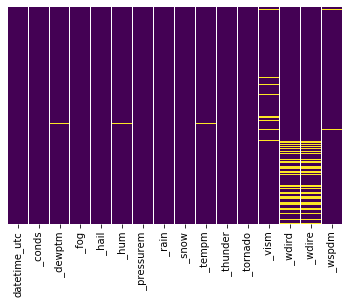

In [6]:
sns.heatmap(data.isnull(),yticklabels = False,cbar= False,cmap='viridis')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 16 columns):
datetime_utc    98913 non-null object
 _conds         98845 non-null object
 _dewptm        98294 non-null float64
 _fog           98913 non-null int64
 _hail          98913 non-null int64
 _hum           98160 non-null float64
 _pressurem     98682 non-null float64
 _rain          98913 non-null int64
 _snow          98913 non-null int64
 _tempm         98244 non-null float64
 _thunder       98913 non-null int64
 _tornado       98913 non-null int64
 _vism          94497 non-null float64
 _wdird         84533 non-null float64
 _wdire         84533 non-null object
 _wspdm         96560 non-null float64
dtypes: float64(7), int64(6), object(3)
memory usage: 12.1+ MB


In [8]:
df = data[['datetime_utc',' _tempm']]

In [9]:
df.head()

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [10]:
df['Datetime'] = pd.to_datetime(df['datetime_utc'])

C:\Users\lalit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.drop('datetime_utc',axis =1,inplace =True)

C:\Users\lalit\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
df.head()

,_tempm,Datetime
0,30.0,1996-11-01 11:00:00
1,28.0,1996-11-01 12:00:00
2,24.0,1996-11-01 13:00:00
3,24.0,1996-11-01 14:00:00
4,23.0,1996-11-01 16:00:00


In [13]:
df = df.set_index('Datetime')

In [14]:
df.head()

,_tempm
Datetime,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [52]:
df.describe()

,_tempm
count,98240.000000
mean,25.576547
std,8.459472
min,1.000000
25%,19.000000
50%,27.000000
75%,32.000000
max,47.000000


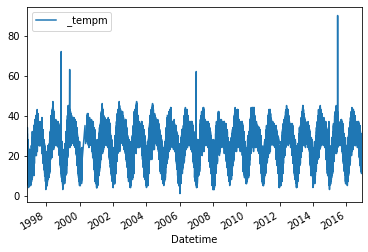

In [15]:
df.plot()

In [16]:
df = df[df[' _tempm']<50]

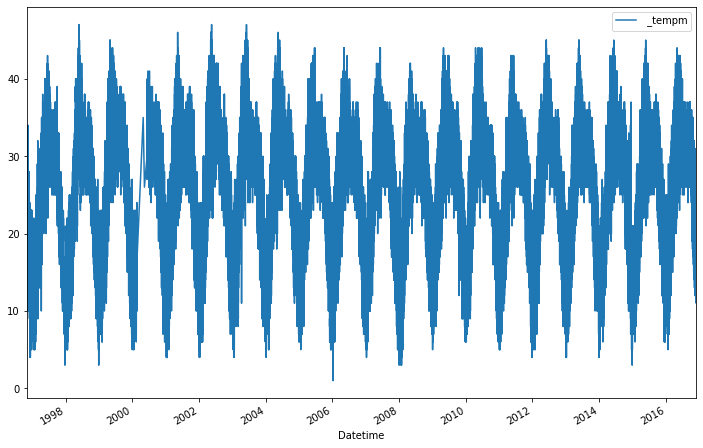

In [17]:
df.plot(figsize = (12,8))

# converting to monthly basis 

In [21]:
df1 = df[' _tempm'].resample('MS').mean()

In [22]:
df1.head()

Datetime
1996-11-01    19.438944
1996-12-01    13.816794
1997-01-01    12.871118
1997-02-01    15.778777
1997-03-01    21.137037
Freq: MS, Name:  _tempm, dtype: float64

In [23]:
df2 =df1.to_frame()

In [24]:
import statsmodels.api as sm

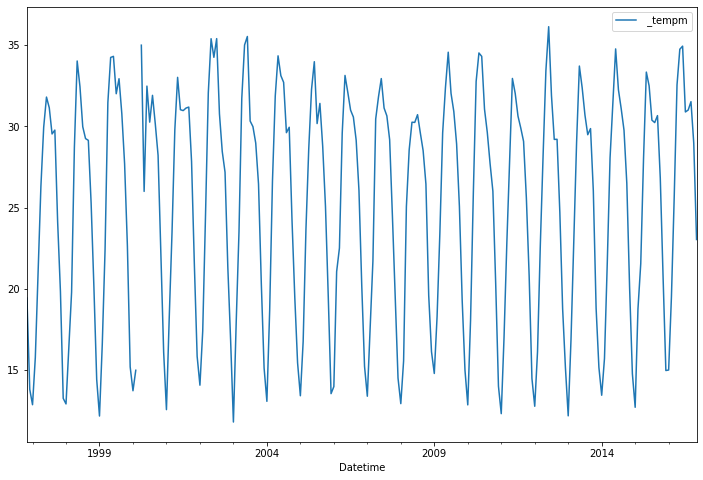

In [25]:
df2.plot(figsize = (12,8))

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 1996-11-01 to 2016-11-01
Freq: MS
Data columns (total 1 columns):
 _tempm    240 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB


In [29]:
model = sm.tsa.statespace.SARIMAX(df2[' _tempm'],order = (1,1,1),seasonal_order = (1,1,1,12))
results = model.fit()

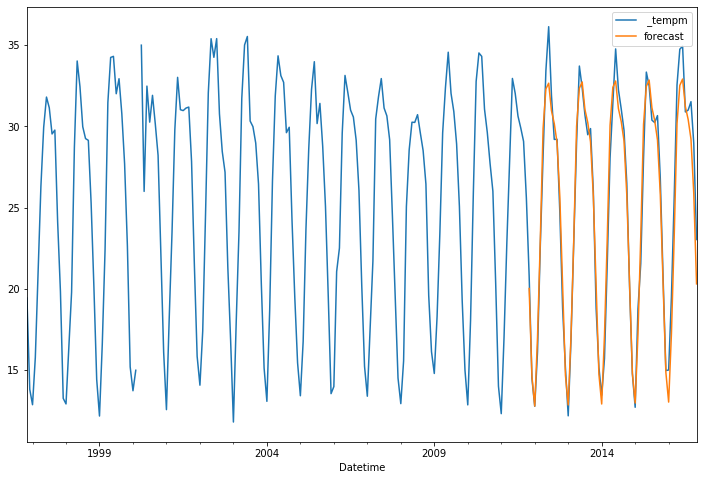

In [30]:
df2['forecast'] = results.predict(start = 180,end = 240,dynamic = True)
df2[[' _tempm','forecast']].plot(figsize = (12,8))

In [32]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [33]:
print('rmse value for model is :',sqrt(mean_squared_error(df2['forecast'][180:],df2[' _tempm'][180:])))

rmse value for model is : 1.359262126881571


In [34]:
from pandas.tseries.offsets import DateOffset
future_dates = [df2.index[-1]+DateOffset(months = x) for x in range(0,48)]

In [35]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df2.columns)

In [36]:
future_dates_df.head()

,_tempm,forecast
2016-12-01,NaN,NaN
2017-01-01,NaN,NaN
2017-02-01,NaN,NaN
2017-03-01,NaN,NaN
2017-04-01,NaN,NaN


In [37]:
future_df2 = pd.concat([df2,future_dates_df])

In [38]:
future_df2.head()

,_tempm,forecast
1996-11-01,19.438944,NaN
1996-12-01,13.816794,NaN
1997-01-01,12.871118,NaN
1997-02-01,15.778777,NaN
1997-03-01,21.137037,NaN


In [39]:
model = sm.tsa.statespace.SARIMAX(future_df2[' _tempm'],order = (1,1,1),seasonal_order = (1,1,1,12))
results = model.fit()

C:\Users\lalit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


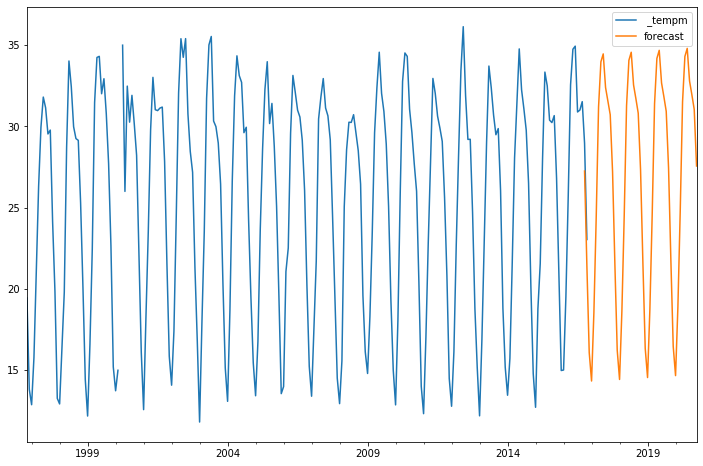

In [44]:
future_df2['forecast'] = results.predict(start = 239,end = 288,dynamic = True)
future_df2[[' _tempm','forecast']].plot(figsize = (12,8))

In [45]:
df3 = future_df2['forecast'][239:287]

In [46]:
df3.head()

2016-10-01    27.251022
2016-11-01    21.387794
2016-12-01    16.077619
2017-01-01    14.330670
2017-02-01    18.549243
Name: forecast, dtype: float64

# converting to daily basis

In [49]:
upsampled = df3.resample('D')
temp= upsampled.interpolate(method ='linear')

# Final temperature value between 2016-10-01 to 2020-09-01

In [50]:
temp

2016-10-01    27.251022
2016-10-02    27.061885
2016-10-03    26.872749
2016-10-04    26.683613
2016-10-05    26.494476
2016-10-06    26.305340
2016-10-07    26.116204
2016-10-08    25.927067
2016-10-09    25.737931
2016-10-10    25.548794
2016-10-11    25.359658
2016-10-12    25.170522
2016-10-13    24.981385
2016-10-14    24.792249
2016-10-15    24.603112
2016-10-16    24.413976
2016-10-17    24.224840
2016-10-18    24.035703
2016-10-19    23.846567
2016-10-20    23.657430
2016-10-21    23.468294
2016-10-22    23.279158
2016-10-23    23.090021
2016-10-24    22.900885
2016-10-25    22.711748
2016-10-26    22.522612
2016-10-27    22.333476
2016-10-28    22.144339
2016-10-29    21.955203
2016-10-30    21.766067
                ...    
2020-08-03    31.888987
2020-08-04    31.860050
2020-08-05    31.831113
2020-08-06    31.802177
2020-08-07    31.773240
2020-08-08    31.744303
2020-08-09    31.715366
2020-08-10    31.686429
2020-08-11    31.657493
2020-08-12    31.628556
2020-08-13    31

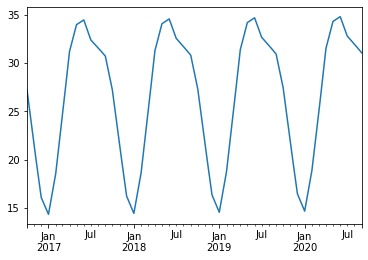

In [51]:
temp.plot()

# Save the model

In [54]:
import pickle

In [55]:
filename = 'lalit_mechademy_model1'

In [56]:
pickle.dump(results, open(filename,'wb'))